In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 2.3 지도 학습 알고리즘
### 2.3.1 dataset

X.shape: (26, 2)


C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


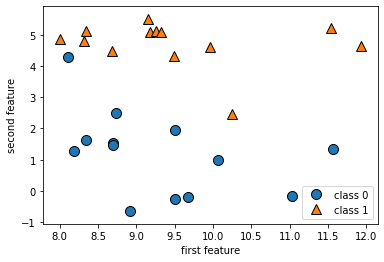

In [2]:
X, y = mglearn.datasets.make_forge() # 인위적 이진 분류 데이터 셋
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')
print("X.shape: {}".format(X.shape))


Text(0, 0.5, 'target')

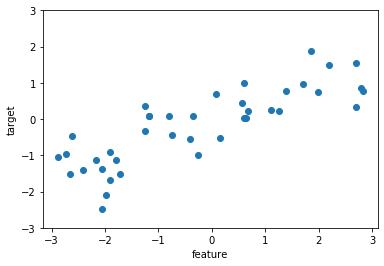

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40) # 인위적 데이터
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # 위스콘신 유방암 데이터
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("shape of breast cancer data: {}".format(cancer.data.shape))

shape of breast cancer data: (569, 30)


In [18]:
print("sample size of each class: \n{}".format(
{n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample size of each class: 
{'malignant': 212, 'benign': 357}


In [19]:
print("feature name: \n{}".format(cancer.feature_names))

feature name: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
print("data shape: {}".format(boston.data.shape))

data shape: (506, 13)


In [21]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 2.3.2 KNN

C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


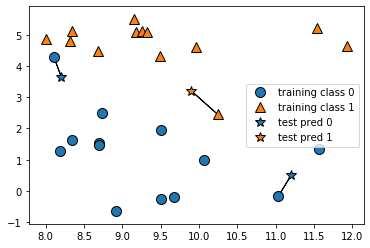

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # for forge dataset

C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


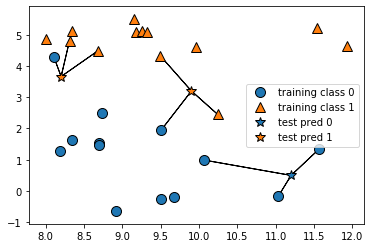

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [33]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\rhyeu\.conda\envs\introduction_to_ml_with_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= 3)

In [35]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
print("test prediction: {}".format(clf.predict(X_test)))

test prediction: [1 0 1 0 1 0 0]


In [37]:
print("test accuracy: {:.2f}".format(clf.score(X_test, y_test)))

test accuracy: 0.86


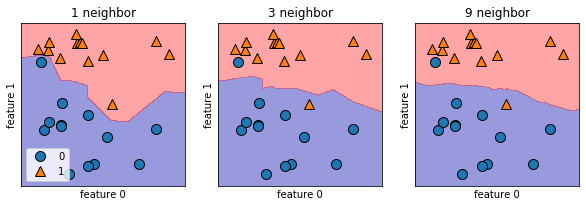

In [39]:
fig, axes = plt.subplots(1,3, figsize = (10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                   ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

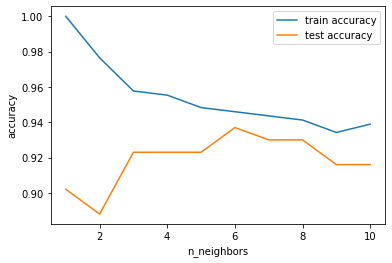

In [43]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state =66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- KNN regression

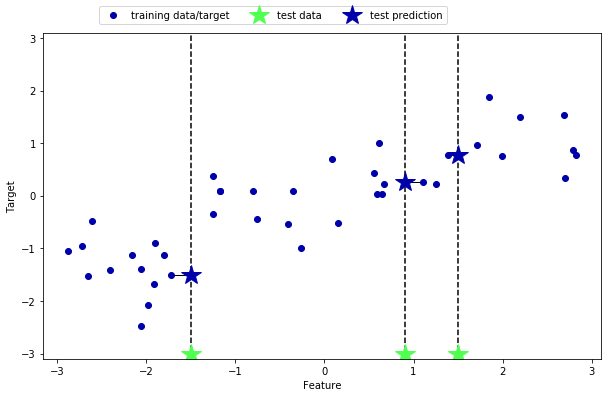

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

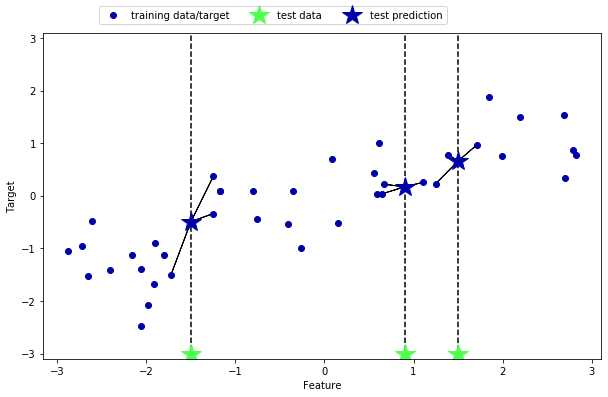

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [50]:
print("testset accuracy: \n{}".format(reg.predict(X_test)))

testset accuracy: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [51]:
print("test R^2: {:.2f}".format(reg.score(X_test, y_test)))

test R^2: 0.83


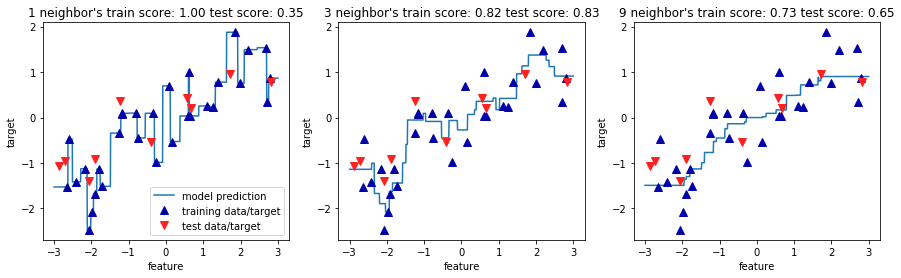

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # 하나의 열을 가진 넘파이 어레이로 만듦
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor's train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

axes[0].legend(["model prediction", "training data/target", 
               "test data/target"], loc="best")